In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

277


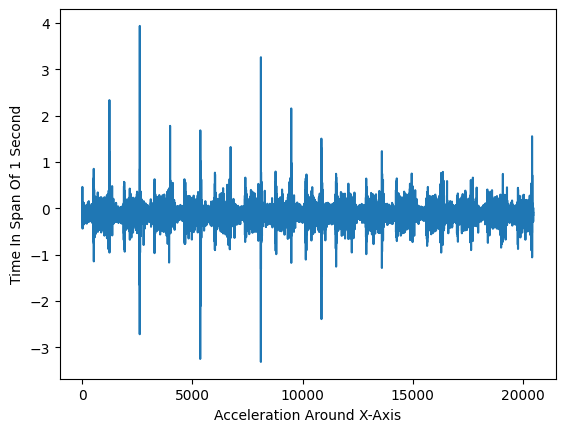

In [27]:
data = pd.read_csv('0.csv')
data210=pd.read_csv('210.csv')
data1412=pd.read_csv('1412.csv')
# Split the combined column into separate columns
data1412[['b1x', 'b1y', 'b4x', 'b4y']] = data1412['b1x;b1y;b4x;b4y'].str.split(';', expand=True)

# Drop the original combined column
data1412 = data1412.drop(columns=['b1x;b1y;b4x;b4y'])


# Convert the new columns to numeric types
data1412[['b1x', 'b1y', 'b4x', 'b4y']] = data1412[['b1x', 'b1y', 'b4x', 'b4y']].apply(pd.to_numeric)
data1412 = data1412.drop(columns=['b1x', 'b1y'])

means=list(data1412[['b4x', 'b4y']].astype(float).mean())

peakCount = 0

Q1 = data1412['b4x'].quantile(0.25)
Q3 = data1412['b4y'].quantile(0.75)
IQR = Q3 - Q1

outlierUP = len(np.where(data1412['b4x'] >= Q3 + 3*IQR)[0])
outlierDown = len(np.where(data1412['b4x'] <= Q1 - 3*IQR)[0])

peakCount = outlierDown + outlierUP
print(peakCount)

#bearing = pd.read_csv('bearing_conditions.csv')
#bearing

plt.plot(data1412['b4x'])
plt.xlabel('Acceleration Around X-Axis')
plt.ylabel('Time In Span Of 1 Second')
plt.show()